In [131]:
%matplotlib inline 

import pandas as pd
import gensim, logging
import logging

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import re
import matplotlib.pyplot as plt

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [27]:
data = pd.read_json('jobs.json')
data = data[['title', 'skills']]

In [99]:
data['remove'] = data.skills.apply(lambda t: False if len(t) > 0 else True)
data = data[data.remove == False]

In [138]:
sentences = data.skills.tolist()
sentences_2 = [ sum([t.split('/') for t in s], []) for s in sentences ]
sentences_3 = [ sum([t.split('-') for t in s], []) for s in sentences_2 ]

def normalize_skill(s):
    s = s.lower()
    s = s.replace('.js', '')
    s = s.replace('"', '')
    return s

sentences_4 = [ [normalize_skill(t) for t in s] for s in sentences_3 ]

print len(sentences)
print len(sentences_3)
print sentences[-3:]
print sentences_4[-300:]

sentences = sentences_4

452
452
[[u'Software Tester / QA Engineer / Test Analyst / Manual / Automation / SQL Server / T-SQL / BI / Business Intelligence / Excel / Web Applications / ASP.'], [u'Python', u'SQL', u'Statistics', u'R', u'Predictive Modelling'], [u'Spring', u'Core Java']]
[[u'infrastructure', u'prince 2', u'software design language'], [u'automation tools', u'java', u'python', u'rdbms', u'computer science'], [u'css', u'html', u'magento', u'jquery'], [u'crm', u'erp', u'microsoft windows', u'it management', u'disaster recovery', u'leadership', u'budgets'], [u'communication skills', u'facilities management', u'management'], [u'documentation', u'java', u'software', u'software development', u'testing'], [u'c#'], [u'active directory', u'digital forensics', u'helpdesk', u'mobile', u'routers', u'switches', u'windows', u'hubs', u'it security', u'windows exchange', u'laptop', u'file share', u'identity access management (iam)', u'endpoint security', u'data loss prevention (dlp)', u'network management', u'monit

In [139]:
# sg defines the training algorithm. By default (sg=0), CBOW is used. Otherwise (sg=1), skip-gram is employed.

model = gensim.models.Word2Vec(sentences, min_count=1, workers=4, size=200,window=20, sg=1)

In [141]:
model.most_similar('sql')

[(u'data', 0.9961785674095154),
 (u'engineer', 0.9958004951477051),
 (u'cloud', 0.9953147768974304),
 (u'software', 0.9951635003089905),
 (u'c#', 0.9950674772262573),
 (u'devops', 0.9950499534606934),
 (u'tdd', 0.9950454235076904),
 (u'2016', 0.9950295686721802),
 (u'greenfield', 0.9949182868003845),
 (u'ip', 0.9947629570960999)]

In [147]:
model.similar_by_word('javascript')

[(u'data', 0.9918654561042786),
 (u'ip', 0.9917047619819641),
 (u'angularjs', 0.9914865493774414),
 (u'c#', 0.991309642791748),
 (u'multi', 0.9912654757499695),
 (u'developer', 0.9910348057746887),
 (u'tdd', 0.9909812211990356),
 (u'cloud', 0.9908775687217712),
 (u'devops', 0.9906114339828491),
 (u'reactjs', 0.9904151558876038)]

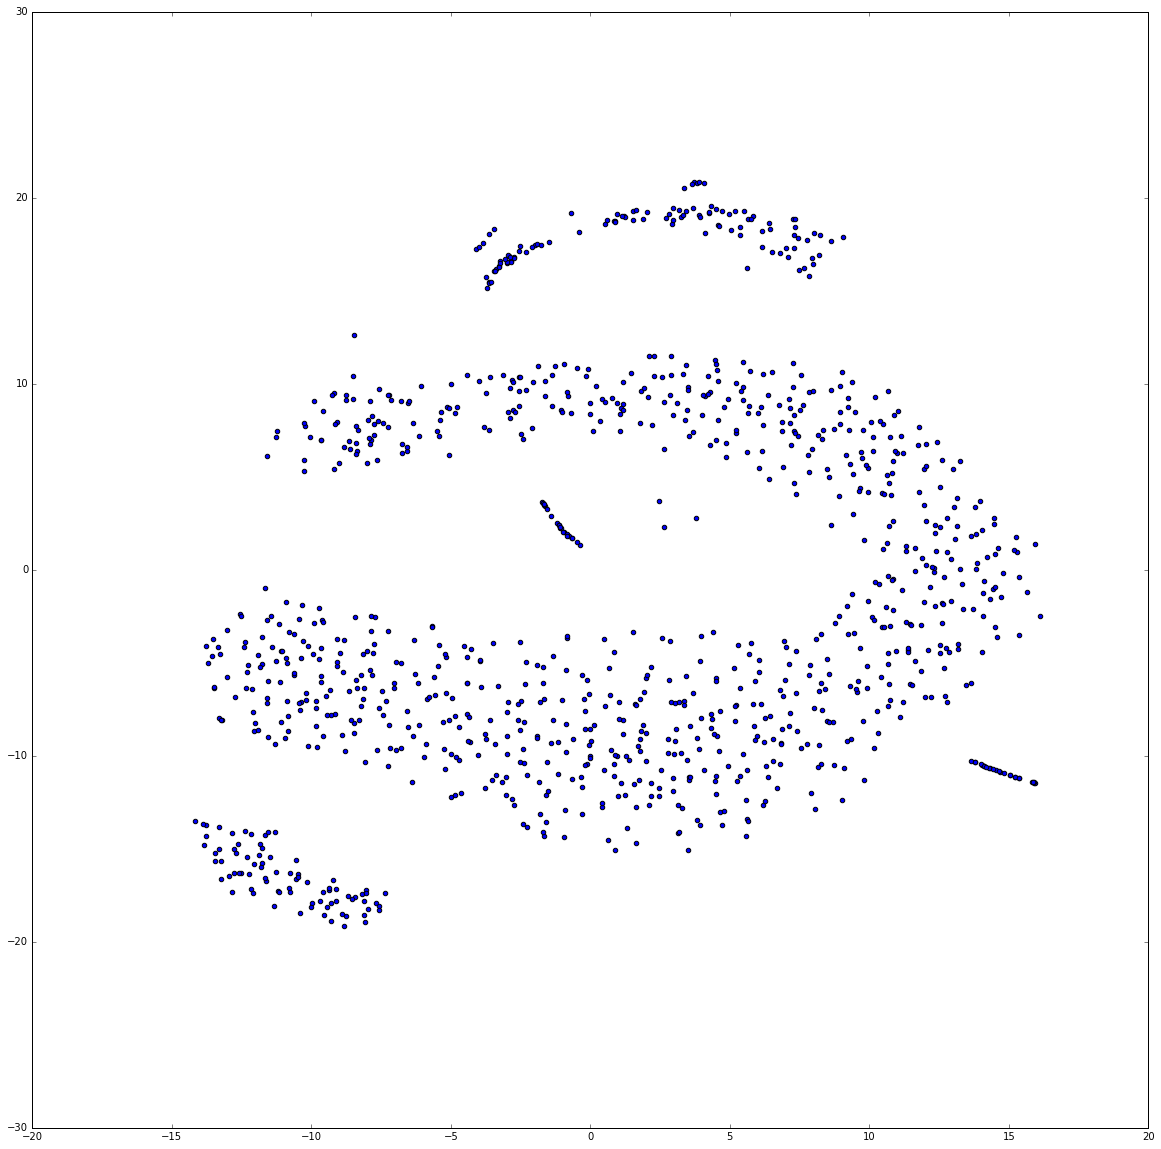

In [148]:
X = model[model.wv.vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(20,20))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

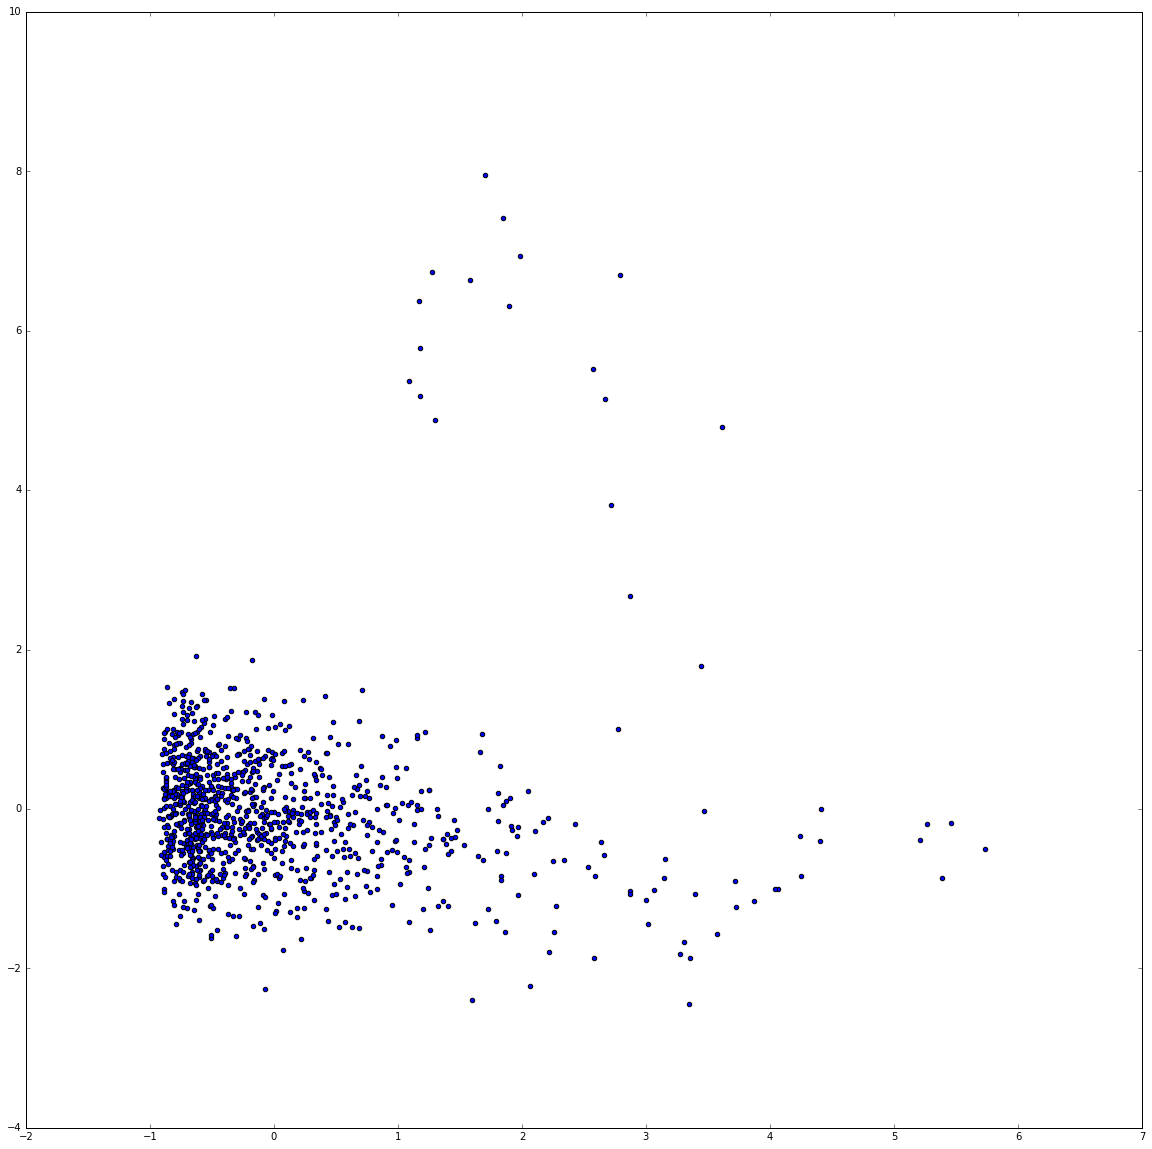

In [149]:

X = model[model.wv.vocab]
pca = PCA(n_components=2, whiten=True)
X_pca = pca.fit(X).transform(X)

plt.figure(figsize=(20,20))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.show()

In [185]:
def draw_words(model, words, pca=False, alternate=True, arrows=True, x1=3, x2=3, y1=3, y2=3, title=''):
    # get vectors for given words from model
    vectors = [model[word] for word in words]

    if pca:
        pca = PCA(n_components=2, whiten=True)
        vectors2d = pca.fit(vectors).transform(vectors)
    else:
        tsne = TSNE(n_components=2, random_state=0)
        vectors2d = tsne.fit_transform(vectors)

    # draw image
    plt.figure(figsize=(10,20))
    if pca:
        plt.axis([x1, x2, y1, y2])

    first = True # color alternation to divide given groups
    for point, word in zip(vectors2d , words):
        # plot points
        plt.scatter(point[0], point[1], c='r' if first else 'g')
        # plot word annotations
        plt.annotate(
            word, 
            xy = (point[0], point[1]),
            xytext = (-7, -6) if first else (7, -6),
            textcoords = 'offset points',
            ha = 'right' if first else 'left',
            va = 'bottom',
            size = "x-large"
        )
        first = not first if alternate else first

    # draw arrows
    if arrows:
        for i in xrange(0, len(words)-1, 2):
            a = vectors2d[i][0] + 0.04
            b = vectors2d[i][1]
            c = vectors2d[i+1][0] - 0.04
            d = vectors2d[i+1][1]
            plt.arrow(a, b, c-a, d-b,
                shape='full',
                lw=0.1,
                edgecolor='#bbbbbb',
                facecolor='#bbbbbb',
                length_includes_head=True,
                head_width=0.05,
                width=0.01
            )

    # draw diagram title
    if title:
        plt.title(title)

    plt.tight_layout()
    plt.show()

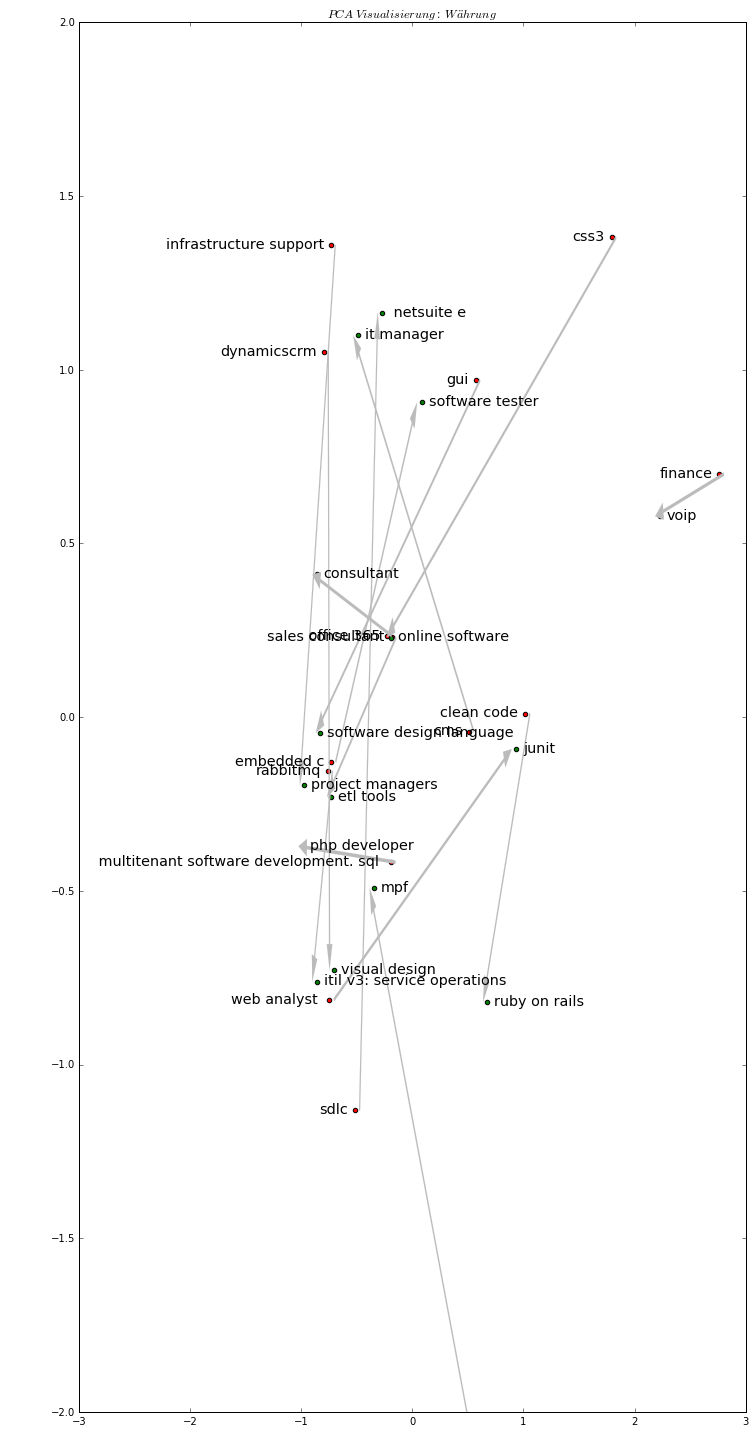

In [186]:
draw_words(model, model.vocab.keys()[30:60], True, True, True, -3, 3, -2, 2, r'$PCA\ Visualisierung:\ W\ddot{a}hrung$')

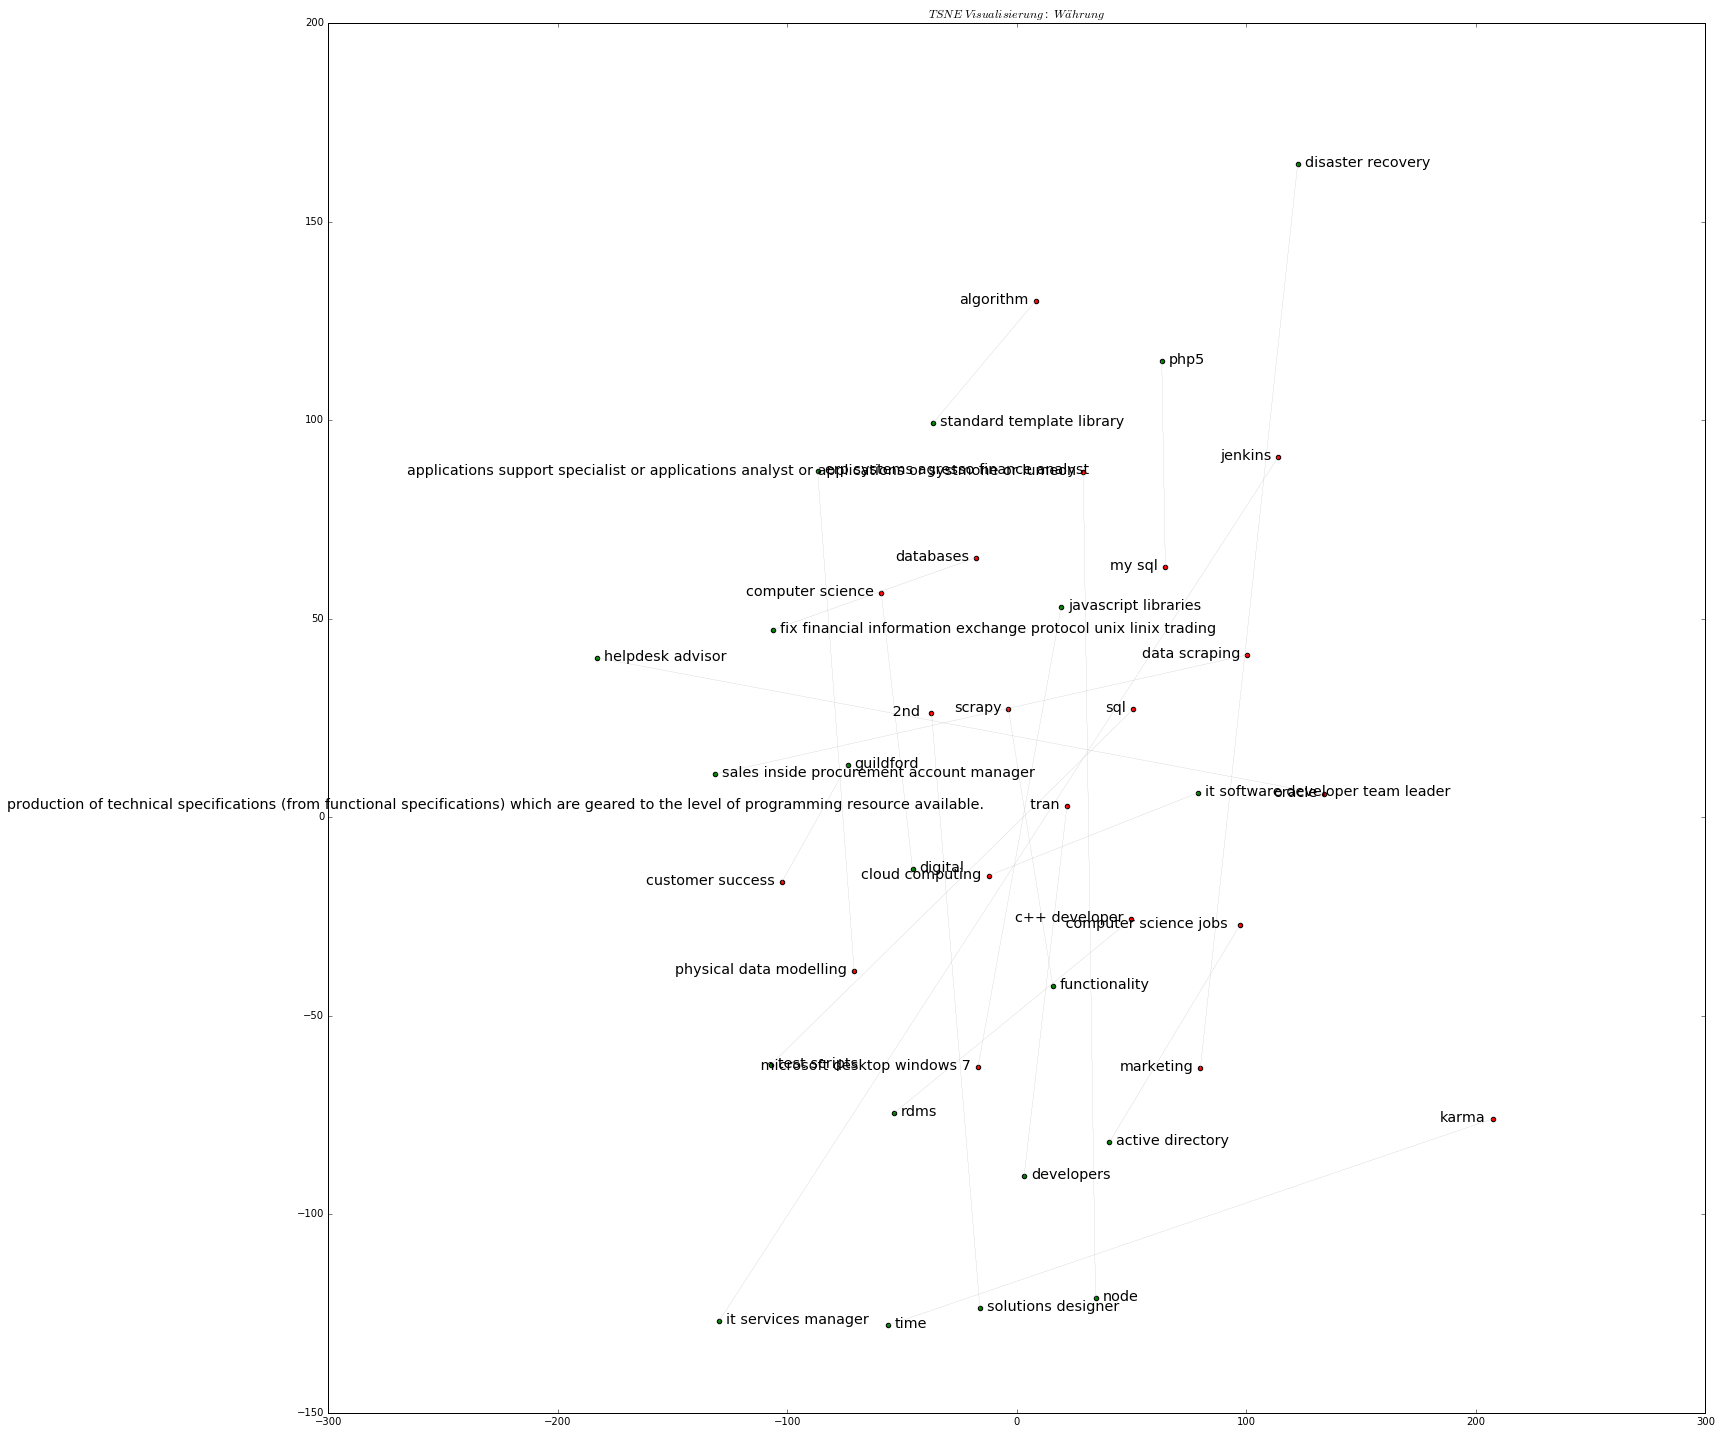

In [184]:
draw_words(model, model.vocab.keys()[-40:], False, True, True, -3, 3, -2, 2, r'$TSNE\ Visualisierung:\ W\ddot{a}hrung$')